# Pymaceuticals_Inc

## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress # added to inital notebook for use in creating a linear regression model

# Study data csv files are in the data folder
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results using Pandas read_csv() method
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# View each of the DataFrames created to decide how to merge the two files

# view the mouse_metadata DataFrame
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# view the study_results DataFrame
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset using Pandas merge() method 
# using study_results as left (most critical and largest dataset) and on="Mouse ID" which is a shared column name
complete_study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the DataFrame
complete_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Display the DataFrame for a single random mouse (Mouse ID = g107)
# sort by Timepoint
complete_study_data[complete_study_data["Mouse ID"] == "g107"].sort_values(by="Timepoint")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,g107,0,45.000000,0,Ketapril,Female,2,29
480,g107,5,48.791665,0,Ketapril,Female,2,29
532,g107,10,53.435987,0,Ketapril,Female,2,29
788,g107,15,58.135545,0,Ketapril,Female,2,29
1049,g107,20,62.706031,0,Ketapril,Female,2,29
1237,g107,25,64.663626,0,Ketapril,Female,2,29
1416,g107,30,69.160520,0,Ketapril,Female,2,29
1542,g107,35,71.905117,0,Ketapril,Female,2,29


In [6]:
# Display the DataFrame for a different random mouse (Mouse ID = u364)
# sort by Timepoint (from the instructions timepoint is a day)
complete_study_data[complete_study_data["Mouse ID"] == "u364"].sort_values(by="Timepoint")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
234,u364,0,45.000000,0,Capomulin,Male,18,17
324,u364,5,45.760886,1,Capomulin,Male,18,17
513,u364,10,46.568417,2,Capomulin,Male,18,17
862,u364,15,47.212200,2,Capomulin,Male,18,17
918,u364,20,40.343948,2,Capomulin,Male,18,17
1206,u364,25,35.503616,2,Capomulin,Male,18,17
1310,u364,30,35.978334,2,Capomulin,Male,18,17
1565,u364,35,35.459490,2,Capomulin,Male,18,17
1704,u364,40,36.024138,2,Capomulin,Male,18,17
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [7]:
# Note the the difference between treatment regimens: 
# The Katapril treatment was for 35 days while the Capomulin was for 45 days
# Based on the views above we would expect there to be a single observation starting on day 0 and every five days until complete

# Check for duplicate entries (i.e. Mouse ID with duplicate Timepoints for the same day(s) 
# First we determine how many unique Mouse IDs are in the study data using the Pandas unique() method and 
# and Python len() to determine the len of the tuple of unique Mouse IDs.

count_mouse_ID_unique = len(complete_study_data["Mouse ID"].unique())
print(f"There are {count_mouse_ID_unique} unique Mouse IDs in the complete_study_data DataFrame")

There are 249 unique Mouse IDs in the complete_study_data DataFrame


In [8]:
# Getting the duplicate mice by Mouse ID number for mouse having a Mouse ID with duplicate Timepoints (two entries for the same day). 
# This is done using the duplicated() menthod auguments (subset=[the names of columns we are interested in])
# In this case find duplicates use subset=["Mouse ID", "Timepoint"] 

# The process is start from the inside and work your way out.
# starting from complete_study_data.duplicated(subset=["Mouse ID", "Timepoint"])
# Then add .loc[] to identify the "Mouse ID" column
# Then find the unique entries using the unique method
# assign all of this to a variable called duplicated_mouse_data
duplicate_mouse_ids = complete_study_data.loc[complete_study_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

# use the print and f-string notation to provide context for the result
print(f"The mouse with Mouse ID {duplicate_mouse_ids} has one or more duplicate entries")

The mouse with Mouse ID ['g989'] has one or more duplicate entries


In [9]:
# Create a clean DataFrame by removing the rows where Mouse ID is g989
# using the isin method and the augument ==False, note the isin method works best when looking "isin" a list i.e. []
# the result is all rows of the complete_study_data that are not in the list [duplicate_mouse_ids]
complete_study_data_cleaned = complete_study_data[complete_study_data["Mouse ID"].isin([duplicate_mouse_ids])==False]
complete_study_data_cleaned # a check confirms the 13 rows with "Mouse ID" g989 have been removed (1893 - 13 = 1880)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# An alternate method when you are trying to select all but one value is to use the same technique we used above
# duplicate_mouse_ids = complete_study_data.loc[complete_study_data["Mouse ID"] == "g989"]
# but use != as the conditional, as this is the not equal to conditional
alt_completed_study_data_cleaned = complete_study_data.loc[complete_study_data["Mouse ID"] != "g989"]
alt_completed_study_data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# also check to see that the number of unique Mouse IDs is now one less than when we started
new_count_mouse_ID_unique = len(complete_study_data_cleaned["Mouse ID"].unique())

# use print and f-string notation to provide context to the result
print(f"There are now {new_count_mouse_ID_unique} unique Mouse IDs in the complete_study_data DataFrame where there were {count_mouse_ID_unique}")

There are now 249 unique Mouse IDs in the complete_study_data DataFrame where there were 249


## Summary Statistics

In [12]:
# Generate a summary statistics DataFrame that identifies summary statics for the effects each drug treatment on the "Turmor Volume (mm3)"
# include: mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together into a DataFrame.
# the technique is to create a variable and assign to that variable the mean tumor volume volume for each Drug Regimen
# use groupby on "Drug Regimem" and use the appropriate aggregation (i.e. mean, median, var, std, sem)
# keep just the "Tumor Volume (mm3)" column from the resulting DataFrame created by the groupby
means = complete_study_data_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = complete_study_data_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = complete_study_data_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_devs = complete_study_data_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_error_means = complete_study_data_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# create a DataFrame to hold the summary statistics
study_summary_table = pd.DataFrame({
    "Mean Tumor Vol" : means,
    "Median Tumor Vol" : medians, 
    "Tumor Volume Variance" : variances,
    "Tumor Volumne Std. Dev." : std_devs,
    "Tumor Volume Std. Error" : std_error_means,
    })
study_summary_table

,Mean Tumor Vol,Median Tumor Vol,Tumor Volume Variance,Tumor Volumne Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# The above technique can be created with single entry using groupby's .agg method
# This technique requires you ad a dictionary of what column you want to aggregate (as the key)
# and what groupby aggregation(s) you want to create as the values in a list
alt_study_summary_table = complete_study_data_cleaned.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
alt_study_summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# For help on the auguments for Pandas plot method try the following
#?pd.DataFrame.plot

Text(0, 0.5, 'Number of Data Points')

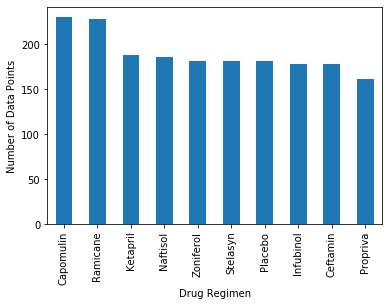

In [15]:
# Generate a bar plot showing the total number of mice
# for each treatment throughout the course of the study using Pandas .plot(kind="bar")
# assign DataFrame column "Drug Regimen" to variable mice_counts
# and use method .value_counts() to get the count of mice used in each treatment
mice_counts = complete_study_data_cleaned["Drug Regimen"].value_counts()
mice_counts

mice_counts.plot(kind="bar")
# use matplotlib (plt) to format the Pandas plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
# display the plot using plt.show just good pratice


Text(0, 0.5, 'Number of Data Points')

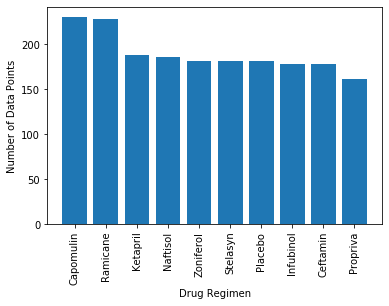

In [16]:
# Generate a bar plot showing the total number of mice 
# for each treatment throughout the course of the study 

# review the mice_counts series created above using mice_counts = complete_study_data_cleaned["Drug Regimen"].value_counts()
mice_counts # note the series is indexed by the treatment name and the count of mice for each treatment
mice_counts.index.values # yields the treatment names (index values)
mice_counts.values # yields the values (count of mice) for each treatment

# Use Matplotlib pyplot (as plt) using the mice_counts series above
plt.bar(mice_counts.index.values, mice_counts.values)

# # add xlabel
plt.xlabel("Drug Regimen")
# # Set text properties using augument rotation=90
plt.xticks(rotation=90) 
# # add ylabel
plt.ylabel("Number of Data Points")



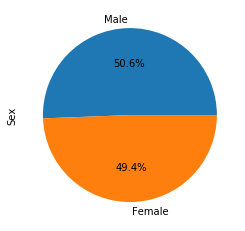

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Exam complete_study_data_cleaned data to be used in the pie plot
# for the pie plot we are interested in the mice Sex column
mice_sex_counts = complete_study_data_cleaned["Sex"].value_counts()
mice_sex_counts

# using Pandas plot method
mice_sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [18]:
# For help on the auguments for Pandas plot method try the following
#?plt.pie

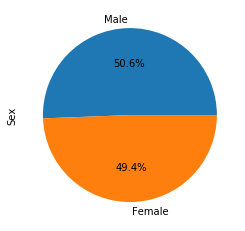

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# use same mice_sex_counts variable created above
mice_sex_counts.values # use as the values
mice_sex_counts.index.values # use as the labels

# use plt.pie for a pie plot with auguments autopct for formating value as a percentage
plt.pie(mice_sex_counts, labels=mice_sex_counts.index.values, autopct="%1.1f%%")
# add y labels
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# using the complete_study_data_cleaned DataFrame and groupby "Mouse ID" and keep justt the max "Timepoint" for each
greatest_timepoint = complete_study_data_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

# Merge greatest_timepoint DataFrame with the original dataframe to get the tumor volume at the last timepoint
merged_study_data = greatest_timepoint.merge(complete_study_data_cleaned, on=["Mouse ID", "Timepoint"], how="left") # note greatest_timepoint is considered the left DataFrame
merged_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# use interator for value in values format
for drug in treatment_list:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_at_max_timepoint = merged_study_data.loc[merged_study_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_volume_at_max_timepoint)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_at_max_timepoint.quantile([.25, .50, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    IQR = upper_quartile - lower_quartile
    outlier_lower_bound = lower_quartile - (1.5 * IQR)
    outlier_upper_bound = upper_quartile + (1.5 * IQR)
    outliers = tumor_volume_at_max_timepoint.loc[(tumor_volume_at_max_timepoint < outlier_lower_bound) |
                                                (tumor_volume_at_max_timepoint > outlier_upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers}")


Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [22]:
# For help on the auguments for Pandas plot method try the following
#?plt.boxplot

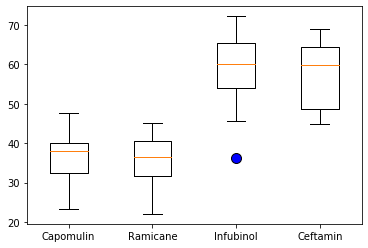

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_outliers = dict(markerfacecolor="blue", markersize=10) # this is used to define the markercolor and size of outliers below using aurgument flierprops=
plt.boxplot(tumor_vol_list, labels= treatment_list, flierprops=blue_outliers)
plt.show()

## Line and Scatter Plots

In [ ]:
# For help on the auguments for Pandas plot method try the following
#?plt.plot() note: a line plot is the default plot when no kind= is included as an augument

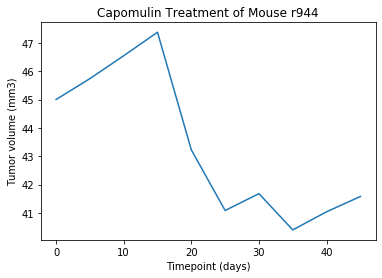

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Build the Capomulin_treatment_table using decribe to view descriptive statistics for number values in the DataFrame
# then again using .head() to select a mouse that is average (not an extreme) to display "typical treatment affect" on a single mouse.

Capomulin_treatment_table = complete_study_data_cleaned.loc[complete_study_data_cleaned['Drug Regimen'] == "Capomulin"]
Capomulin_treatment_table.describe()

Capomulin_treatment_table.head(50)
# review the table and select a mouse: I will select "Mouse ID" == r944 as it seems a representative mouse for the teatment

Capomulin_treatment_table_for_mouse_r944 = Capomulin_treatment_table.loc[Capomulin_treatment_table['Mouse ID'] == "r944"]
Capomulin_treatment_table_for_mouse_r944 # view the data to examine specifics before plotting

# create a line plot with timepoint (as the x-values) vs. tumor volumne (as the y-values) for mouse r944
plt.plot(Capomulin_treatment_table_for_mouse_r944["Timepoint"], Capomulin_treatment_table_for_mouse_r944["Tumor Volume (mm3)"])
# use matplotlib plt methods to add labels for x axis, y axis and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Capomulin Treatment of Mouse r944")
plt.show()


In [25]:
# View the Capomulin_treatment_table again to assist in generating the scatter plot below
Capomulin_treatment_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [ ]:
# Generate a scatter plot of mouse weight (x_ais) versus average tumor volume (y_axis) for the Capomulin regimen
# create a capomulin_avg_table (DataFrame) using the Capomulin_treatment_table DataFrame created above
# and groupby "Mouse ID" and use the aggregation of mean to get the capomulin_avg_table DataFrame
capomulin_avg_table = Capomulin_treatment_table.groupby(["Mouse ID"]).mean()

In [ ]:
# For help on the auguments for Pandas plot method try the following
#?plt.scatter

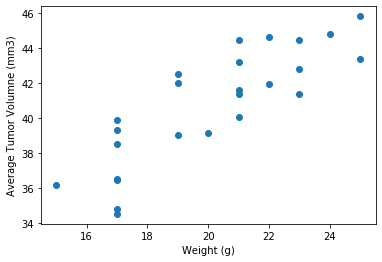

In [26]:
# Continue: Generate a scatter plot of mouse weight (x_ais) versus average tumor volume (y_axis) for the Capomulin regimen
plt.scatter(capomulin_avg_table["Weight (g)"], capomulin_avg_table["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumne (mm3)")
# plt.title()
plt.show()


## Correlation and Regression

In [27]:
# For help with finding the pearson r using the scipy.stats as st imported (see dependencies in cell 1) use the follow:
#?st.pearsonr 

In [28]:
# Calculate the correlation coefficient and linear regression model
# see activity 06-Ins_Correlation_Conundrum Solved for example of Correlation
# for mouse weight and average tumor volume for all mice undergoing the Capomulin regimen
# This is done using the scipy.stats library imported above as st
Capomulin_mouse_wt = capomulin_avg_table["Weight (g)"]
Capomulin_avg_tumor_vol = capomulin_avg_table["Tumor Volume (mm3)"]

correlation = st.pearsonr(Capomulin_mouse_wt, Capomulin_avg_tumor_vol)
correlation # note the method returns r: Pearson's correlation coefficient and the p-value (for Two-tailed p-value)

# if you just want r then use [0] to select it as it is the first in the array
print(f"The correlation between both factors is {round(correlation[0],2)}") # use round with augument 2 to round to 2 decimal places

The correlation between both factors is 0.84


In [31]:
# For help with linear regression imported under pendencies using from scipy.stats import linregress us the following:
?st.linregress

In [32]:
# Create a linear regression equation and line to plot
# see activity08-Ins_Fit_and_Regression Solved to example on regression line
# since linregress nees x_values and y_values create these variables for better understanding (not required)
x_values = Capomulin_mouse_wt
y_values = Capomulin_avg_tumor_vol

# Note in the help linregress() Returns: slope, intercept, rvalue, pvalue, stderr
# Therefore we must identify those as variables (on the left) and assign linregress(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Note you can view these newly created variables using %whos which will display all variables created
# %whos

# Assign to line_eq the equation for the line created from the variables used in linregress above
# round is included for better visual appearance (not required)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))




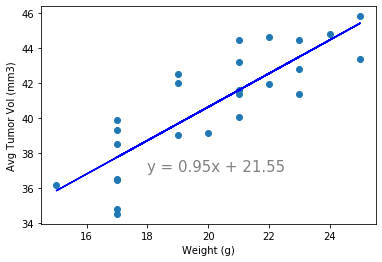

In [34]:
# create a scatter plot and include the linear equation and line with the scatter plot
plt.scatter(Capomulin_mouse_wt, Capomulin_avg_tumor_vol)
plt.plot(x_values, regress_values, "b-") # this plots the line (x values = x_values, and y values = regress_values)

# use plt.annotate to add the equation for the line created
# note with annotate you can tell matplotlib where to start the annotation (this uses the plot x and y values - here(18,37) seems good
plt.annotate(line_eq,(18,37), fontsize=15, color="grey") # note the (20,36 is the location to start the annotate on plot)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")

plt.show()